In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
from sklearn.datasets import load_digits
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,classification_report
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA

To avoid Warnings

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
data = load_digits()

In [4]:
digits = pd.DataFrame(data.data)

In [5]:
target = pd.DataFrame(data.target)

In [6]:
digits.head()

,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,63
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,9.0,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0


In [59]:
print(digits.shape)

(1797, 64)


Image Show and Iloc index starts from 0 . Here 14 means 15TH row , It will retrive 15th row.

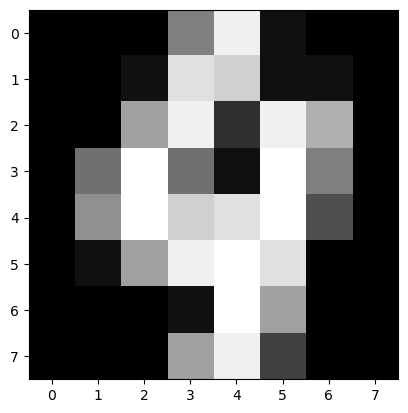

In [7]:
plt.imshow(digits.iloc[14].values.reshape(8,8),cmap='gray')

To avoid biasing random stae is used to shuffle data.

In [8]:
x_train,x_test,y_train,y_test = train_test_split(digits,target,test_size=0.2,random_state=42)

n_estimators = 100 trees are created, max_depth = depth of a tree

In [9]:
random = RandomForestClassifier(n_estimators=100,max_depth=10,min_samples_split=0.2)

In [10]:
random.fit(x_train,y_train)

RandomForestClassifier(max_depth=10, min_samples_split=0.2)

In [11]:
predict=random.predict(x_test)

In [12]:
print("Accuracy Score for Randoom Forest Classifier without PCA is",format(accuracy_score(y_test,predict)))

Accuracy Score for Randoom Forest Classifier without PCA is 0.8194444444444444


Precision =TP/(TP + FP).                                                                                                        
Recall = TP / (TP + FN).                                                                                                         
F1-score = 2 * (precision * recall) / (precision + recall).                                                                     
It's the number of true instances for each class.]

In [13]:
print(classification_report(y_test,predict))

              precision    recall  f1-score   support

           0       0.89      1.00      0.94        33
           1       0.74      0.71      0.73        28
           2       0.84      0.94      0.89        33
           3       0.84      0.91      0.87        34
           4       0.97      0.78      0.87        46
           5       0.97      0.64      0.77        47
           6       0.87      0.97      0.92        35
           7       0.59      1.00      0.74        34
           8       0.89      0.57      0.69        30
           9       0.76      0.72      0.74        40

    accuracy                           0.82       360
   macro avg       0.84      0.82      0.82       360
weighted avg       0.85      0.82      0.82       360



In [14]:
pca = PCA(0.95)

In [15]:
x = pca.fit_transform(digits)

In [16]:
x.shape

(1797, 29)

In [17]:
x_train,x_test,y_train,y_test = train_test_split(x,target,test_size=0.2,random_state=42)

In [18]:
random = RandomForestClassifier(n_estimators=100,max_depth=10,min_samples_split=0.2)

In [19]:
len(pca.components_)

29

In [20]:
pca.explained_variance_ratio_

array([0.14890594, 0.13618771, 0.11794594, 0.08409979, 0.05782415,
       0.0491691 , 0.04315987, 0.03661373, 0.03353248, 0.03078806,
       0.02372341, 0.02272697, 0.01821863, 0.01773855, 0.01467101,
       0.01409716, 0.01318589, 0.01248138, 0.01017718, 0.00905617,
       0.00889538, 0.00797123, 0.00767493, 0.00722904, 0.00695889,
       0.00596081, 0.00575615, 0.00515158, 0.0048954 ])

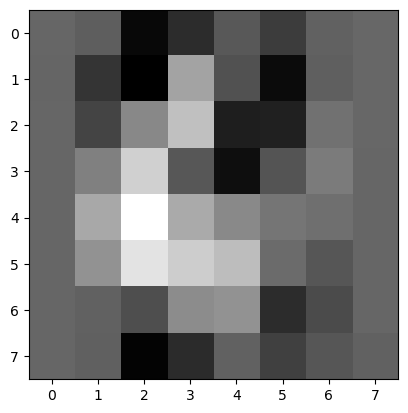

In [21]:
plt.imshow(pca.components_[0].reshape(8,8),cmap="gray")